# ARMA Exercises
Feb 24th 2022

In [3]:
import sys
print(sys.executable)
import numpy as np
import pandas as pd
import os
print(os.getcwd())
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

/home/razielar/miniconda3/envs/time-series/bin/python
/home/razielar/Documents/git_rep/Machine_learning/time_series_forecasting/coursera_time_series_forecasting/time_series_analysis/week_3/1_arma_models


In [4]:
# Custom functions:
import src.colorsetup

## Input data

In [5]:
data_path= "course_data/"
ex_1= pd.read_csv(data_path+"auto_1.csv")
ex_2= pd.read_csv(data_path+"auto_2.csv")
display(ex_1.head())
display(ex_2.head())
# Create time 
mytime= np.arange(ex_1.shape[0])

,0
0,-1.92
1,0.97
2,1.22
3,0.83
4,2.59


,0
0,0.33
1,0.62
2,-0.65
3,0.41
4,1.48


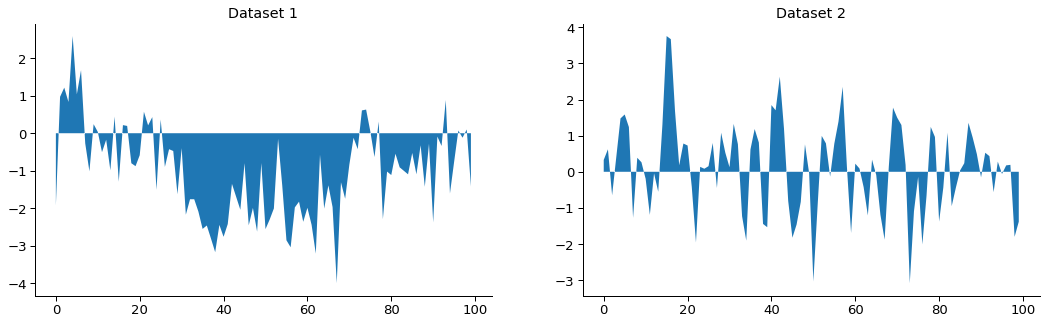

In [6]:
auto_1= ex_1.values.reshape(-1)
auto_2= ex_2.values.reshape(-1)

# Plot
fig, axes= plt.subplots(1,2)
fig.set_figwidth(18)

axes[0].fill_between(mytime, auto_1)
axes[0].set_title("Dataset 1")
axes[1].fill_between(mytime, auto_2)
axes[1].set_title("Dataset 2")

plt.show()

## Determine p & q

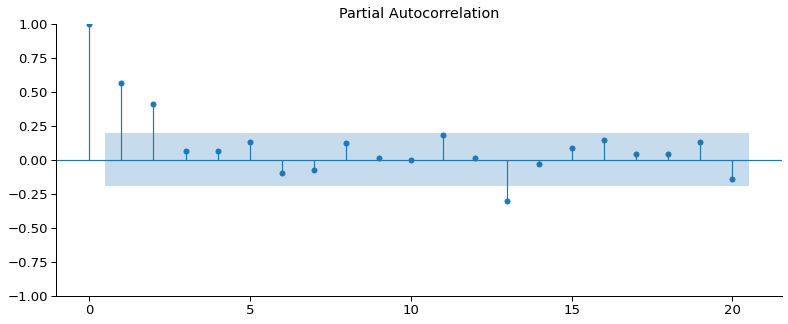

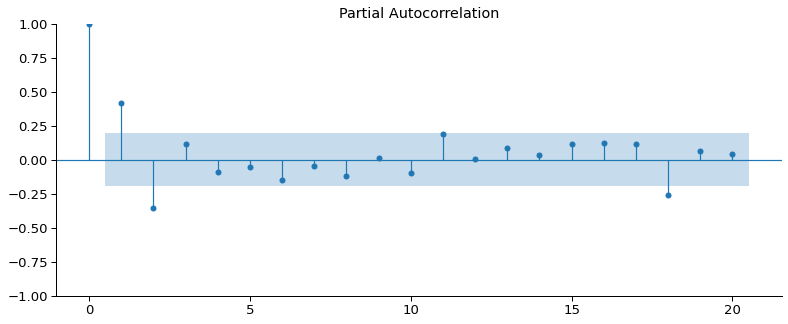

In [7]:
fig_p1= plot_pacf(auto_1)
# We're going to use 'q' for dataset2 bc lag1 and lag2 they cancel each other
fig_p2= plot_pacf(auto_2)

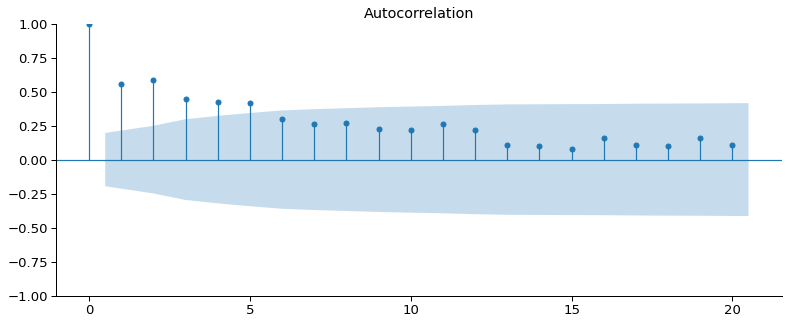

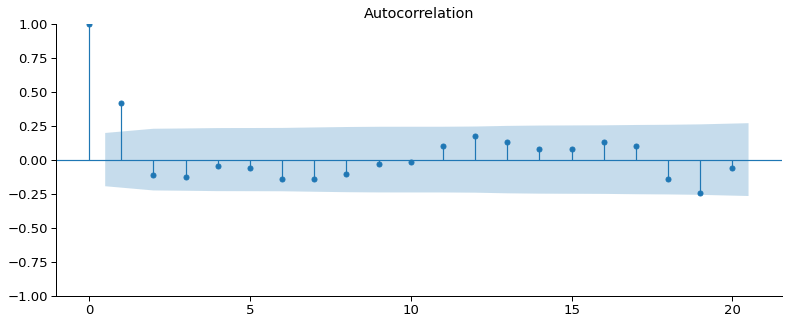

In [8]:
fig_a1= plot_acf(auto_1)
fig_a2= plot_acf(auto_2)

## Conclusions
For auto_1; p= 2  
For auto_2; q= 1

In [9]:
model_1= ARIMA(auto_1, order= (2,0,0)).fit()
print("Auto_1 parameters: {}".format(model_1.params[1:3]))

Auto_1 parameters: [0.31480006 0.41215767]


In [11]:
model_2= ARIMA(auto_2, order= (0,0,1)).fit()
print("Auto_2 parameters: {:.4f}".format(model_2.params[1]))

Auto_2 parameters: 0.6267


In [13]:
import session_info
session_info.show()